In [1]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from data_loader.watershed_masks_reader import WatershedMasksReader
from data_loader.simple_masks_reader import SimpleMasksReader
import config
params = config.local

In [3]:
reader1 = WatershedMasksReader(224,224)
reader2 = SimpleMasksReader(224,224)

In [4]:
from glob import glob
paths = [glob("/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/input/stage1_train/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48/masks/*.png")]
mask1 = reader1.read(paths)
mask2 = reader2.read(paths)

0.00it [00:00, ?it/s]
0it [00:00, ?it/s]
0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


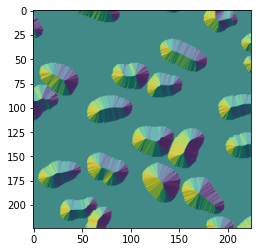

In [29]:
plt.imshow(mask1[0,:,:,0], alpha=1, cmap=plt.cm.gray)
plt.imshow(mask1[0,:,:,1], alpha=0.65)

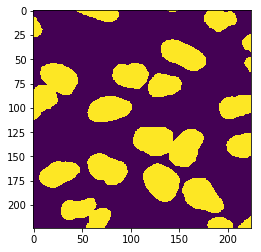

In [6]:
plt.imshow(mask2[0,:,:,0])

In [7]:
import numpy as np
from scipy import ndimage
from skimage.io import imread
from skimage.transform import resize

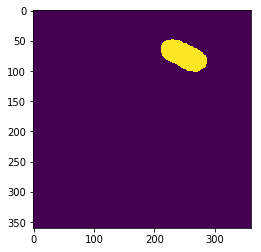

In [8]:
img = imread(paths[0][2])
plt.imshow(img)

In [9]:
u,v=np.gradient(ndimage.distance_transform_edt(img))

In [10]:
l = np.stack([u,v], axis=2)
l.shape

(360, 360, 2)

In [11]:
q = np.sum(np.stack([l,l,l,l]), axis=0)
resize(q, (224,224), mode='constant', preserve_range=True).max()

4.0

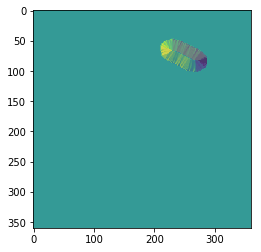

In [12]:
plt.imshow(u, alpha=0.7)
plt.imshow(v, alpha=0.7)